# Tunisian Horses


In [1]:
import os
import pandas as pd
import re
from PIL import Image

# Set the path to the main directory containing the folders of images
main_dir = 'THoDBRL2015data'
search_in_dir = 'Croped Images'

# Initialize a list to hold metadata
metadata = []

# Recursively walk through each folder and subfolder to collect metadata
for root, dirs, files in os.walk(main_dir):
    # 'root' is the current directory in the hierarchy
    # 'dirs' are the directories in 'root'
    # 'files' are the files in 'root'
    # basename = os.path.basename(root)
    if search_in_dir in root:
        for filename in files:
            if filename.endswith(('.png', '.jpg', '.jpeg')):  # Adjust extensions as needed
                file_path = os.path.join(root, filename)

                # Extract the folder name as the relative path from main_dir to the current folder
                relative_folder_path = os.path.relpath(root, main_dir)

                match_horse_id = re.search(r'\d+$', relative_folder_path)
                horse_id = match_horse_id.group() if match_horse_id else None  # Assign None if no match is found

                # Determine category based on filename content
                if 'Dhr' in filename: # Droit
                    camera_position_category = 'Right'
                elif 'Ghr' in filename: # Gauche
                    camera_position_category = 'Left'
                elif 'fhr' in filename: # front
                    camera_position_category = 'Front'
                else:
                    camera_position_category = 'Unknown'

                match_position = re.sub(r'\d', '', filename)
                # camera_position = match_position.group() if match_position else None

                with Image.open(main_dir + '/' + relative_folder_path + '/' + filename) as img:
                    width, height = img.size  # .size returns (width, height)

                # Determine orientation
                if width > height:
                    orientations = 'Landscape'
                elif height > width:
                    orientation = 'Portrait'
                else:
                    orientation = 'Square'


                # Add metadata: Folder path, filename, and full file path
                metadata.append({
                    'file_path': file_path,
                    'horse_id': horse_id,
                    'photo_id': re.search(r'\d+', filename).group(),
                    'folder': relative_folder_path,  # This will give the relative path of the folder structure
                    'filename': filename,
                    'format': filename.split('.')[-1],
                    'camera_position': camera_position_category,
                    'file_size': os.path.getsize(file_path),
                    'width': width,
                    'height': height,
                    'aspect_ratio': width / height,
                    'orientation': orientation,
                })

# Create DataFrame with specified dtypes
metadata_df = pd.DataFrame(metadata, dtype='object').astype({
    'file_path': 'string',
    'horse_id': 'int64',          # Assuming it's an integer
    'photo_id': 'int64',          # Assuming it's an integer
    'folder': 'string',
    'filename': 'string',
    'format': 'category',        # Categorical for file format
    'camera_position': 'category', # Categorical for camera position
    'file_size': 'int64',         # Integer for file size in bytes
    'width': 'int64',             # Integer for width
    'height': 'int64',             # Integer for height
    'aspect_ratio': 'float',
    'orientation': 'category',
})
# Convert metadata list to a DataFrame
# metadata_df = pd.DataFrame(metadata)
metadata_df

,file_path,horse_id,photo_id,folder,filename,format,camera_position,file_size,width,height,aspect_ratio,orientation
0,THoDBRL2015data/Part3/Croped Images/27/Dhr10.jpg,27,10,Part3/Croped Images/27,Dhr10.jpg,jpg,Right,9511,165,260,0.634615,Portrait
1,THoDBRL2015data/Part3/Croped Images/27/Ghr9.jpg,27,9,Part3/Croped Images/27,Ghr9.jpg,jpg,Left,11120,165,260,0.634615,Portrait
2,THoDBRL2015data/Part3/Croped Images/27/Ghr8.jpg,27,8,Part3/Croped Images/27,Ghr8.jpg,jpg,Left,11179,165,260,0.634615,Portrait
3,THoDBRL2015data/Part3/Croped Images/27/fhr10.jpg,27,10,Part3/Croped Images/27,fhr10.jpg,jpg,Front,12079,160,380,0.421053,Portrait
4,THoDBRL2015data/Part3/Croped Images/27/fhr4.jpg,27,4,Part3/Croped Images/27,fhr4.jpg,jpg,Front,13243,160,380,0.421053,Portrait
...,...,...,...,...,...,...,...,...,...,...,...,...
1405,THoDBRL2015data/Part1/Croped Images/5/Ghr5.jpg,5,5,Part1/Croped Images/5,Ghr5.jpg,jpg,Left,5733,165,260,0.634615,Portrait
1406,THoDBRL2015data/Part1/Croped Images/5/Ghr4.jpg,5,4,Part1/Croped Images/5,Ghr4.jpg,jpg,Left,5970,165,260,0.634615,Portrait
1407,THoDBRL2015data/Part1/Croped Images/5/Ghr1.jpg,5,1,Part1/Croped Images/5,Ghr1.jpg,jpg,Left,5965,165,260,0.634615,Portrait
1408,THoDBRL2015data/Part1/Croped Images/5/Ghr3.jpg,5,3,Part1/Croped Images/5,Ghr3.jpg,jpg,Left,6122,165,260,0.634615,Portrait


In [2]:
metadata_df['horse_id'].unique()

array([27, 29, 28, 26, 21, 30, 24, 23, 22, 25, 32, 35, 34, 33, 38, 36, 31,
       37, 39, 40, 42, 45, 44, 43, 46, 41, 47, 20, 18, 11, 16, 17, 19, 15,
       12, 13, 14,  9,  7,  6,  1, 10,  8,  4,  3,  2,  5])

In [3]:
metadata_df.dtypes

file_path          string[python]
horse_id                    int64
photo_id                    int64
folder             string[python]
filename           string[python]
format                   category
camera_position          category
file_size                   int64
width                       int64
height                      int64
aspect_ratio              float64
orientation              category
dtype: object

In [4]:
metadata_df['camera_position'].unique()

['Right', 'Left', 'Front']
Categories (3, object): ['Front', 'Left', 'Right']

In [5]:
metadata_df['aspect_ratio'].unique()

array([0.63461538, 0.42105263])

In [6]:
metadata_df['orientation'].unique()

['Portrait']
Categories (1, object): ['Portrait']

In [7]:
grouped_horse_camera = metadata_df.groupby(['horse_id', 'camera_position'], observed=True)
grouped_horse_camera.size()


horse_id  camera_position
1         Front              10
          Left               10
          Right              10
2         Front              10
          Left               10
                             ..
46        Left               10
          Right              10
47        Front              10
          Left               10
          Right              10
Length: 141, dtype: int64

In [8]:
grouped_horse_camera

In [9]:
# Apply different aggregations for each column
agg_df = grouped_horse_camera.agg({
    'file_size': ['min', 'max'],
     # 'file_size': 'max'
    'aspect_ratio': 'max',
    # 'brightness': ['min', 'max']  # Min and max of brightness
})
print("Aggregated DataFrame with multiple functions:")
print(agg_df)

Aggregated DataFrame with multiple functions:
                         file_size        aspect_ratio
                               min    max          max
horse_id camera_position                              
1        Front                7644  10103     0.421053
         Left                 6526   7450     0.634615
         Right                6609   7002     0.634615
2        Front                9088  10601     0.421053
         Left                 6360   6952     0.634615
...                            ...    ...          ...
46       Left                 4724   5587     0.634615
         Right                4107   5958     0.634615
47       Front                5319   7349     0.421053
         Left                 5398   7760     0.634615
         Right                4778   5952     0.634615

[141 rows x 3 columns]


In [10]:
grouped_horse = metadata_df.groupby(['horse_id'], observed=True)
agg_horse_df = grouped_horse.agg({
    'file_size': ['min', 'max', 'mean', 'std'],
})
agg_horse_df

file_size                                  
               min    max          mean          std
horse_id                                            
1             6526  10103   7752.000000  1158.073609
2             5425  10601   7536.533333  1917.279749
3             5704  10352   7980.733333  1625.104473
4             5839   8748   7162.366667   814.105453
5             5235   8194   6497.666667  1017.035663
6             7653  12249   8914.500000  1415.320111
7             8638  10736   9158.966667   483.908689
8             8113  11392   9631.133333   974.976843
9             6784  10062   8362.666667  1113.906742
10            5821   8601   6796.266667   761.134812
11            4967   8656   6947.733333   988.305374
12            3528   6281   4963.700000   851.650614
13            5541   8722   6529.033333   887.587800
14            5734   9500   7238.566667  1345.916370
15            4917   6412   5656.866667   368.286501
16            4688   7296   5902.833333   681.689133
17            5413   9674   7081.100000  1055.988484
18            7086  11887   8907.533333  1713.023013
19            4325   6454   5411.966667   726.851998
20            5495  11185   7138.533333  1697.168143
21            5023   8368   6314.533333   985.168032
22            6282   9019   7530.666667   752.764484
23            6030  11084   8058.166667  1827.139598
24            4390   9733   6970.033333  1336.027707
25            3520   9534   6843.033333  2012.360417
26            5683   9637   6832.233333  1214.386341
27            9473  13309  10874.400000  1056.333202
28            7048  11252   8749.200000  1486.842834
29            4366   7502   5766.233333   947.082514
30            3679   7033   5693.600000   791.846842
31            5951   8344   6781.033333   677.364237
32            3641   6224   4802.066667   875.810243
33            5851   9334   6959.166667  1349.291719
34            4942   8412   6576.700000  1057.981949
35            4479   8043   5824.233333   899.575788
36            4714  10853   7595.633333  1791.043704
37            5618   8060   6999.600000   776.682938
38            5104   7192   6028.900000   708.706658
39            6159   9699   7215.333333  1082.412705
40            4246   8343   5811.433333  1092.061028
41            5656  10087   7468.333333  1130.663868
42            5177   7266   5900.500000   705.626537
43            5721   8022   6828.433333   481.601043
44            4165   6879   5741.300000   680.833523
45            3742   8499   5901.600000  1372.393143
46            4107   8023   5843.433333  1064.582084
47            4778   7760   6146.300000   821.915095

In [11]:
grouped_camera_position = metadata_df.groupby(['camera_position'], observed=True)
agg_camera_position_df = grouped_camera_position.agg({
    'file_size': ['min', 'max', 'mean', 'std'],
    'width': ['min', 'max', 'mean'],
    'height': ['min', 'max', 'mean'],
})
agg_camera_position_df

file_size                                  width              \
                      min    max         mean          std   min  max   mean   
camera_position                                                                
Front                3679  13309  8084.736170  1688.761026   160  160  160.0   
Left                 3520  11593  6551.559574  1356.432561   165  165  165.0   
Right                3641  10744  6276.053191  1337.828203   165  165  165.0   

                height              
                   min  max   mean  
camera_position                     
Front              380  380  380.0  
Left               260  260  260.0  
Right              260  260  260.0

So, all the Front images are 160x380. The Left and Right images are 165x260.

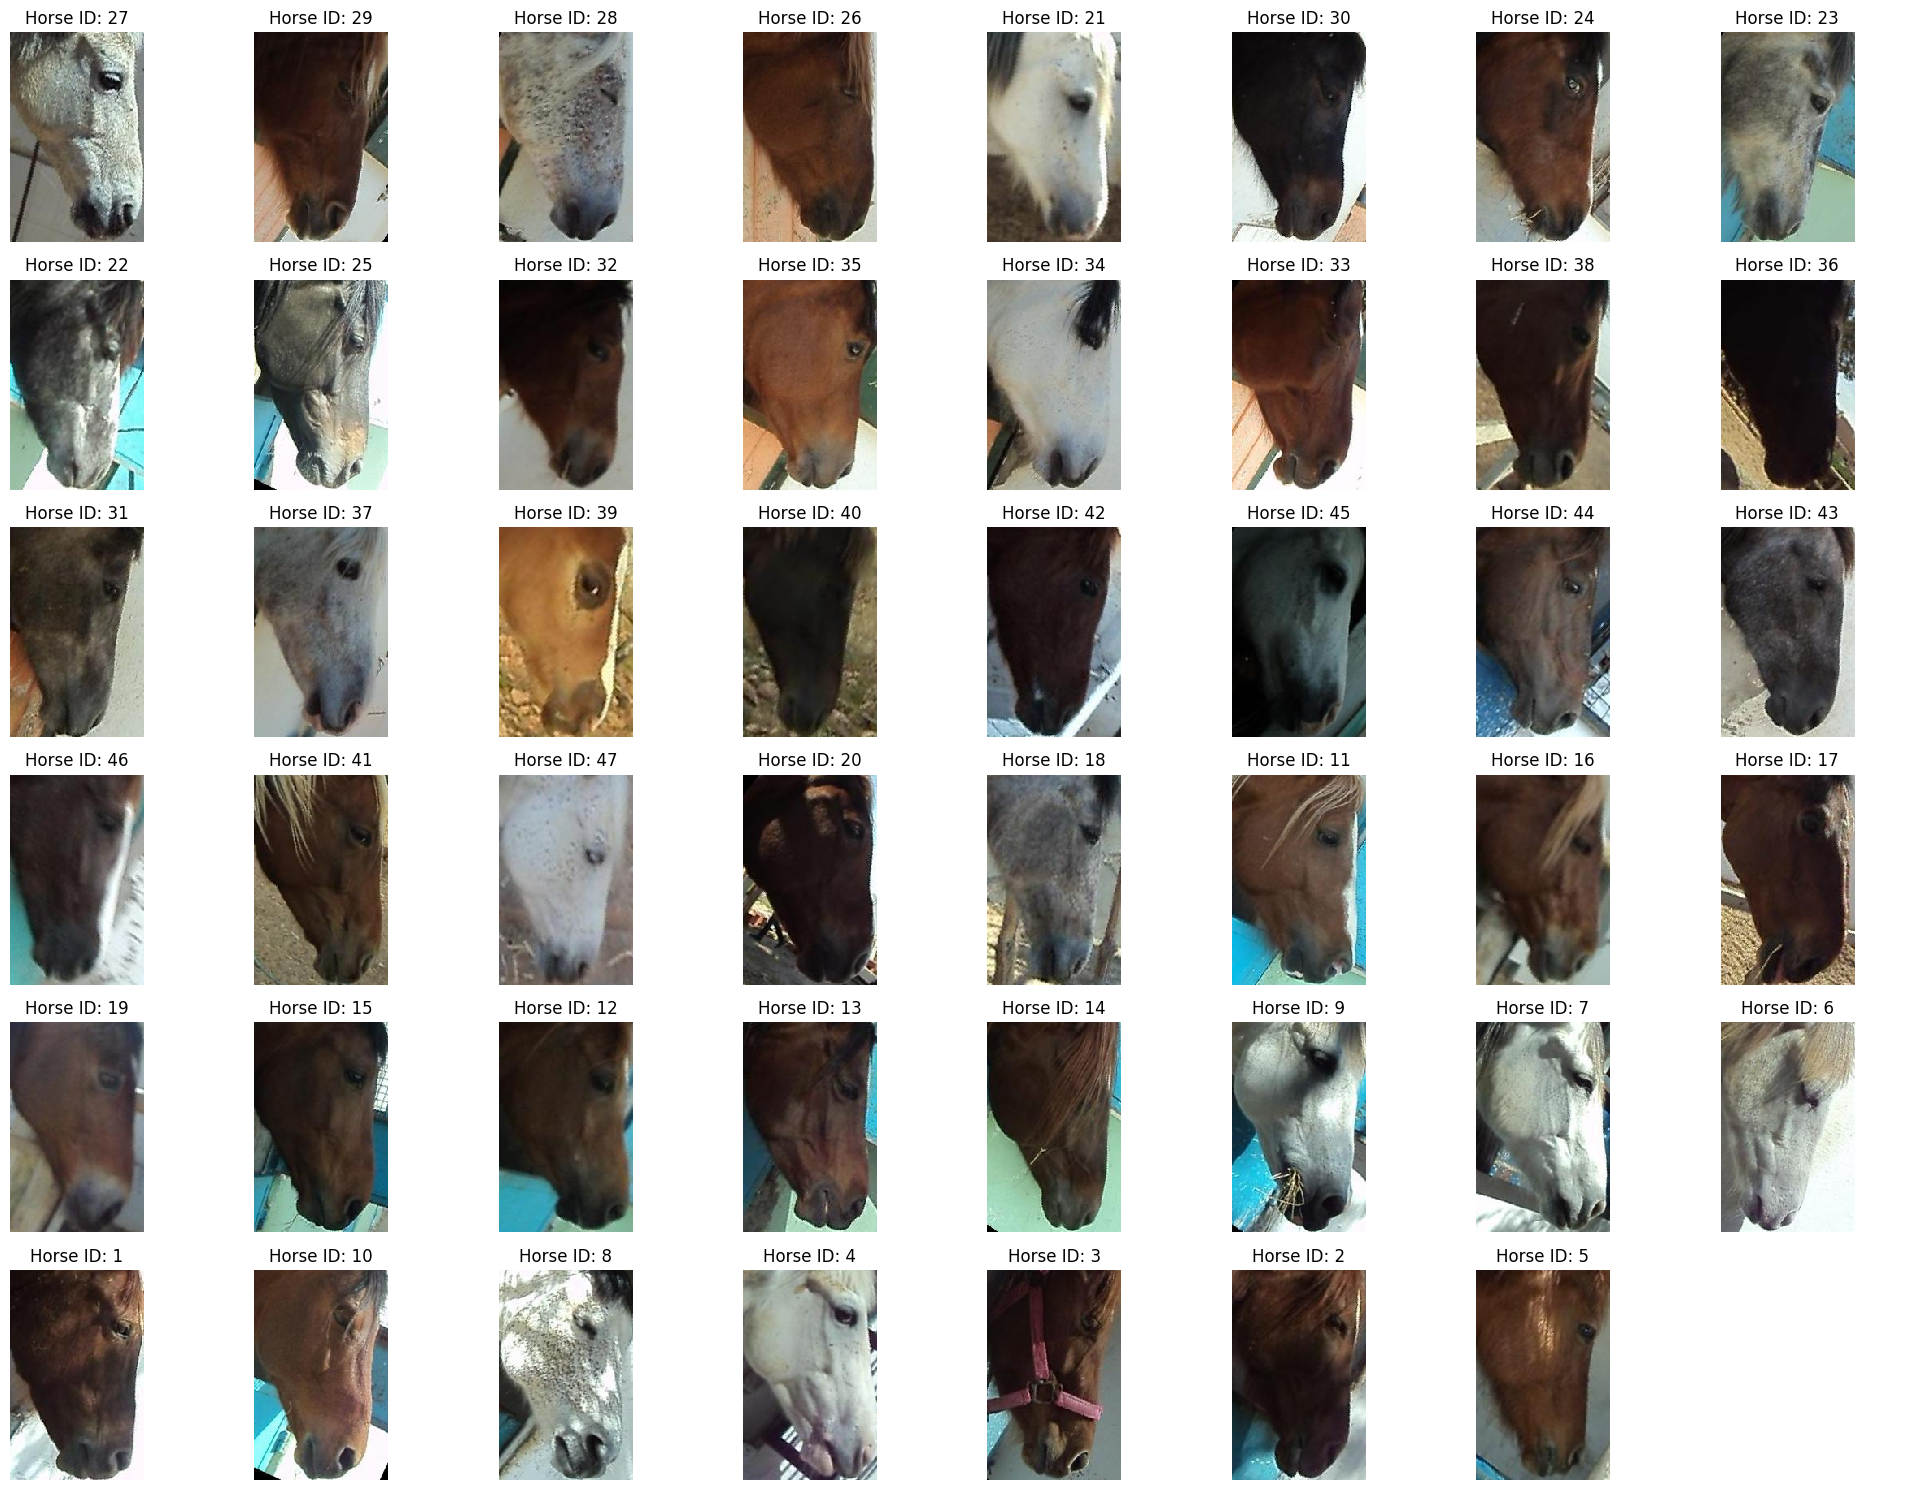

In [12]:
from matplotlib import pyplot as plt

# Retain only relevant columns for displaying images by horse ID
data = metadata_df[['horse_id', 'file_path']]


# Drop duplicates to get one image per horse
data_unique_horses = data.drop_duplicates(subset=['horse_id'])

# Set grid size to display 47 images (8 columns, 6 rows)
cols, rows = 8, 6

# Create a figure with a static grid of subplots
fig, axes = plt.subplots(rows, cols, figsize=(20, 15), dpi=100)  # Set DPI for higher resolution

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Display each selected image
for i, (idx, row) in enumerate(data_unique_horses.iterrows()):
    img_path = row['file_path']

    # Check if the file path is valid before loading
    if os.path.exists(img_path):
        img = Image.open(img_path).convert("RGB")  # Ensure RGB mode
        axes[i].imshow(img, interpolation='nearest')  # Avoid interpolation
    else:
        # Display a placeholder text if image path is invalid
        axes[i].text(0.5, 0.5, "Image Not Found", ha='center', va='center', color="red")

    # Hide axes and set title as horse ID
    axes[i].axis('off')
    axes[i].set_title(f"Horse ID: {row['horse_id']}")

# Hide any remaining empty subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

In [3]:
from sklearn.model_selection import train_test_split



A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.1.3 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "/Users/thijs/miniconda3/lib/python3.12/runpy.py", line 198, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/Users/thijs/miniconda3/lib/python3.12/runpy.py", line 88, in _run_code
    exec(code, run_globals)
  File "/Users/thijs/miniconda3/lib/python3.12/site-packages/ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "/Users/thijs/miniconda3/lib/python3.12/site-packages/traitlets/config/application.py", line 1075, in launch_instance
    app.start()
  Fil

ImportError: 
A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.1.3 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.



ImportError: numpy.core._multiarray_umath failed to import

ImportError: numpy.core.umath failed to import

In [7]:
import tensorflow.keras as keras


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.1.3 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "/Users/thijs/miniconda3/lib/python3.12/runpy.py", line 198, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/Users/thijs/miniconda3/lib/python3.12/runpy.py", line 88, in _run_code
    exec(code, run_globals)
  File "/Users/thijs/miniconda3/lib/python3.12/site-packages/ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "/Users/thijs/miniconda3/lib/python3.12/site-packages/traitlets/config/application.py", line 1075, in launch_instance
    app.start()
  Fil

ImportError: 
A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.1.3 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.



ImportError: numpy.core._multiarray_umath failed to import

ImportError: numpy.core.umath failed to import

In [5]:
from tensorflow.keras.utils import to_categorical



A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.1.3 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "/Users/thijs/miniconda3/lib/python3.12/runpy.py", line 198, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/Users/thijs/miniconda3/lib/python3.12/runpy.py", line 88, in _run_code
    exec(code, run_globals)
  File "/Users/thijs/miniconda3/lib/python3.12/site-packages/ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "/Users/thijs/miniconda3/lib/python3.12/site-packages/traitlets/config/application.py", line 1075, in launch_instance
    app.start()
  Fil

ImportError: 
A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.1.3 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.



ImportError: numpy.core._multiarray_umath failed to import

ImportError: numpy.core.umath failed to import

In [9]:
import numpy as np
print(np.__version__)

2.1.3


In [2]:


print(y_train.max())  # Max label value
num_classes = len(metadata_df['horse_id'].unique())
print(num_classes)  # Controleer het aantal klassen


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.1.3 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "/Users/thijs/miniconda3/lib/python3.12/runpy.py", line 198, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/Users/thijs/miniconda3/lib/python3.12/runpy.py", line 88, in _run_code
    exec(code, run_globals)
  File "/Users/thijs/miniconda3/lib/python3.12/site-packages/ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "/Users/thijs/miniconda3/lib/python3.12/site-packages/traitlets/config/application.py", line 1075, in launch_instance
    app.start()
  Fil

ImportError: 
A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.1.3 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.




A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.1.3 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "/Users/thijs/miniconda3/lib/python3.12/runpy.py", line 198, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/Users/thijs/miniconda3/lib/python3.12/runpy.py", line 88, in _run_code
    exec(code, run_globals)
  File "/Users/thijs/miniconda3/lib/python3.12/site-packages/ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "/Users/thijs/miniconda3/lib/python3.12/site-packages/traitlets/config/application.py", line 1075, in launch_instance
    app.start()
  Fil

ImportError: 
A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.1.3 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.




A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.1.3 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "/Users/thijs/miniconda3/lib/python3.12/runpy.py", line 198, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/Users/thijs/miniconda3/lib/python3.12/runpy.py", line 88, in _run_code
    exec(code, run_globals)
  File "/Users/thijs/miniconda3/lib/python3.12/site-packages/ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "/Users/thijs/miniconda3/lib/python3.12/site-packages/traitlets/config/application.py", line 1075, in launch_instance
    app.start()
  Fil

ImportError: 
A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.1.3 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.




A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.1.3 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "/Users/thijs/miniconda3/lib/python3.12/runpy.py", line 198, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/Users/thijs/miniconda3/lib/python3.12/runpy.py", line 88, in _run_code
    exec(code, run_globals)
  File "/Users/thijs/miniconda3/lib/python3.12/site-packages/ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "/Users/thijs/miniconda3/lib/python3.12/site-packages/traitlets/config/application.py", line 1075, in launch_instance
    app.start()
  Fil

ImportError: 
A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.1.3 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.



ImportError: numpy.core._multiarray_umath failed to import

ImportError: numpy.core.umath failed to import

In [63]:


# Dataset voorbereiden
def load_images_and_labels(metadata_df):
    images = []
    labels = []
    
    for _, row in metadata_df.iterrows():
        if os.path.exists(row['file_path']):
            img = Image.open(row['file_path']).resize((128, 128))  # Schalen naar een vast formaat
            images.append(np.array(img))
            labels.append(row['horse_id'])  # Gebruik horse_id als label
    
    images = np.array(images)
    labels = np.array(labels)
    
    return images, labels

# Laad data
images, labels = load_images_and_labels(metadata_df)

# Splitsen in train en test sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Normaliseer pixelwaarden
X_train = X_train / 255.0
X_test = X_test / 255.0

# Labels omzetten naar categorische data
num_classes = len(metadata_df['horse_id'].unique())
y_train = y_train - 1  # Indien nodig de labels aanpassen
y_test = y_test - 1  # Ook testlabels aanpassen

# Labels omzetten naar categorische data
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)



In [64]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),  # Voorkom overfitting
    Dense(num_classes, activation='softmax')  # Outputlaag
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Modeloverzicht
model.summary()


c:\Users\Jaspe\School\HBO Fontys Techniek en Logistiek Venlo Mechatronica\Semester 7\Data Science\Python\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 47)             │         6,063 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,310,703 (12.63 MB)

 Trainable params: 3,310,703 (12.63 MB)

 Non-trainable params: 0 (0.00 B)

In [65]:
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(X_test, y_test)
)


Epoch 1/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 17s 340ms/step - accuracy: 0.0224 - loss: 3.8513 - val_accuracy: 0.0674 - val_loss: 3.5981
Epoch 2/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 12s 328ms/step - accuracy: 0.0662 - loss: 3.5149 - val_accuracy: 0.3227 - val_loss: 2.7497
Epoch 3/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 13s 351ms/step - accuracy: 0.2824 - loss: 2.6733 - val_accuracy: 0.6773 - val_loss: 1.4557
Epoch 4/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 12s 323ms/step - accuracy: 0.5025 - loss: 1.7442 - val_accuracy: 0.8014 - val_loss: 0.8554
Epoch 5/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 11s 316ms/step - accuracy: 0.6562 - loss: 1.1308 - val_accuracy: 0.9113 - val_loss: 0.4208
Epoch 6/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 15s 410ms/step - accuracy: 0.7411 - loss: 0.8336 - val_accuracy: 0.9078 - val_loss: 0.4277
Epoch 7/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 12s 327ms/step - accuracy: 0.7958 - loss: 0.6752 - val_accuracy: 0.9326 - val_loss: 0.2616
Epoch 8/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 11s 292ms/step - accuracy: 0.8574 - loss: 0.4508 - val_accu

In [66]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - accuracy: 0.9444 - loss: 0.1508
Test Accuracy: 95.39%


In [67]:
model.save('horse_identifier_cnn.h5')


In [79]:
from tensorflow.keras.models import load_model

# Laad het model
model = load_model('horse_identifier_cnn.h5')

# Classificeer een nieuwe afbeelding
def classify_image(img_path):
    img = Image.open(img_path).resize((128, 128))
    img_array = np.array(img) / 255.0  # Normaliseren
    img_array = np.expand_dims(img_array, axis=0)  # Voeg een batch-dimensie toe
    
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction)
    return predicted_class

new_image_path = "Testfotos Paard.jpg"
predicted_horse = classify_image(new_image_path)
print(f"Voorspelde Horse ID: {predicted_horse}")



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step
Voorspelde Horse ID: 1


In [69]:
# Zorg ervoor dat je testdata goed is voorbereid, net als je trainingsdata
# In dit voorbeeld wordt aangenomen dat je X_test (inputdata) en y_test (labels) hebt

# Model evalueren op de testset
test_loss, test_accuracy = model.evaluate(X_test, y_test)

# Toon de resultaten van de evaluatie
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - accuracy: 0.9444 - loss: 0.1508
Test Loss: 0.14623714983463287
Test Accuracy: 0.9539006948471069


9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step


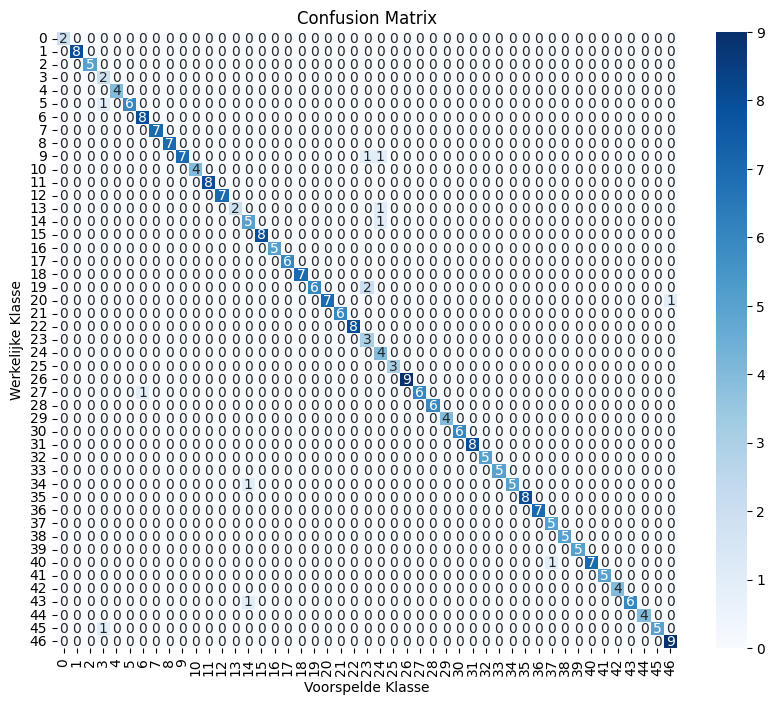

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Zorg ervoor dat je class_names hebt
class_names = [str(i) for i in range(num_classes)]  # Vervang dit met werkelijke horse_id's als nodig

# Voorspel de labels voor de testset
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Genereer de confusion matrix
cm = confusion_matrix(np.argmax(y_test, axis=1), y_pred_classes)

# Plot de confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Voorspelde Klasse')
plt.ylabel('Werkelijke Klasse')
plt.title('Confusion Matrix')
plt.show()
